# DBSCAN

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import dbscan
from sklearn.datasets import make_blobs

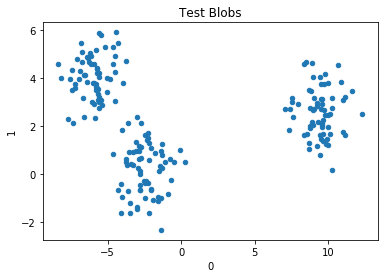

In [120]:
# Create Blobs
df = pd.DataFrame(make_blobs(200)[0])

df.plot(
    x=0, 
    y=1, 
    kind="scatter",
    title="Test Blobs"
)
plt.show()

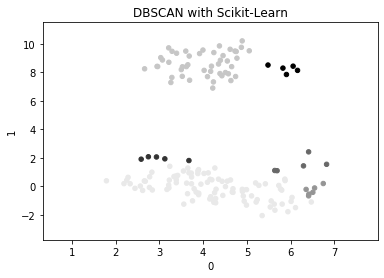

In [40]:
# Create labels using DBSCAN
df["labels"] = dbscan(df, 1, 5)[1]

# Plot the labels
df.plot(
    x=0,
    y=1,
    kind="scatter",
    title="DBSCAN with Scikit-Learn",
    c="labels",
    colorbar=False
)

plt.show()

In [258]:
# Implement by hand

class dbscan2():
    def __init__(self,df, epsilon=1, min_points=5):
        self.df = df
        self.epsilon = epsilon
        self.min_points = min_points
        self.cluster_label = 0
        self.noise = 0
        
    def fit(self):
        "Fit the data"
        
        # Create labels column initialized to -1 (undefined)
        self.df["labels"] = -1
        
        for x in range(len(self.df)):
            
            # if the point is not labled already then search for neighbors
            if self.df["labels"][x] != -1:
                continue
            
            # find neighbors
            p = self.df.iloc[x,:2]
            neighbors = self.rangeQuery(p)
            
            # If less neighbors than min_points then label as noise and continue
            if len(neighbors) < self.min_points:
                self.df.iloc[x,2] = self.noise
                continue

            # increment cluster label
            self.cluster_label += 1

            # set current row to new cluster label
            self.df.iloc[x,2] = self.cluster_label

            # create seed set to hold all neighbors of cluster including the neighbors already found
            seed_set = set(neighbors)
            found_neighbors = seed_set
            more_neighbors = True
            
            while more_neighbors == True:
                
                for x in range(len(seed_set)):

                    # current row
                    cur_seed = seed_set.pop()
                    print("cur Seed", cur_seed)
                    cur_row = self.df.iloc[cur_seed]

                    # if cur_row labled noise then change to cluster label (border point)
                    if cur_row["labels"] == 0:
                        cur_row["labels"] = self.cluster_label

                    # previously processed border point
                    if cur_row["labels"] != -1:
                        continue

                    # label the neighbor
                    cur_row["labels"] = self.cluster_label

                    # look for neightbors of cur_row
                    point = cur_row[:2]
                    neighbors2 = self.rangeQuery(point)
                    
                    temp_val = len(found_neighbors)

                    # if neighbors2 >= min_points then add those neighbors to seed_set
                    if len(neighbors2) >= self.min_points:
                        
                        for x in neighbors2:
                            if x not in found_neighbors:
                                seed_set.add(x)
                                found_neighbors.add(x)
                                print("found neighbors", found_neighbors)
                                
                            else:
                                continue
                            
                    if temp_val == len(found_neighbors):
                        more_neighbors = False
                            
                                
                    
                         
            
    
    def predict(self):
        "Return the predicted labels"
        pass
        
    
    def rangeQuery(self, x):
        """Query database against x and return all points that are <= epsilon"""
        
        neighbors = []
        
        for y in range(len(self.df)):
            q = self.df.iloc[y, :2]
            if self.dist(x, q) <= self.epsilon:
                neighbors.append(y)
        
        return neighbors
    
    def dist(self, point1, point2):
        """Euclid distance function"""
        
        x1 = point1[0]
        x2 = point2[0]
        y1 = point1[1]
        y2 = point2[1]
        
        # create the points 
        p1 = (x1 - x2)**2
        p2 = (y1 - y2)**2

        return np.sqrt(p1 + p2)

test_df = df[:10].copy()
test = dbscan2(test_df, 0.5, 2)
test.fit()

cur Seed 6
cur Seed 7
found neighbors {6}
found neighbors {7, 6}
found neighbors {8, 7, 6}
cur Seed 8
found neighbors {8, 7, 6}
cur Seed 7
found neighbors {8, 7, 6}
cur Seed 6
cur Seed 8
found neighbors {8, 7}
cur Seed 7
found neighbors {8, 6}
found neighbors {8, 6, 7}
cur Seed 7
found neighbors {8, 6, 7}
cur Seed 8
found neighbors {8, 6, 7}
cur Seed 6
cur Seed 7
found neighbors {8, 6}
found neighbors {8, 6, 7}
cur Seed 8
found neighbors {8, 6, 7}
cur Seed 6
cur Seed 7
found neighbors {8, 6}
found neighbors {8, 6, 7}
cur Seed 8
found neighbors {8, 6, 7}
cur Seed 6
cur Seed 7
found neighbors {8, 6}
found neighbors {8, 6, 7}
cur Seed 8
found neighbors {8, 6, 7}
cur Seed 6
cur Seed 7
found neighbors {8, 6}
found neighbors {8, 6, 7}
cur Seed 8
found neighbors {8, 6, 7}
cur Seed 6
cur Seed 7
found neighbors {8, 6}
found neighbors {8, 6, 7}
cur Seed 8
found neighbors {8, 6, 7}
cur Seed 6
cur Seed 7
found neighbors {8, 6}
found neighbors {8, 6, 7}
cur Seed 8
found neighbors {8, 6, 7}
cur Seed

/Users/mph/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


 {8, 6}
found neighbors {8, 6, 7}
cur Seed 8
found neighbors {8, 6, 7}
cur Seed 6
cur Seed 7
found neighbors {8, 6}
found neighbors {8, 6, 7}
cur Seed 8
found neighbors {8, 6, 7}
cur Seed 6
cur Seed 7
found neighbors {8, 6}
found neighbors {8, 6, 7}
cur Seed 8
found neighbors {8, 6, 7}
cur Seed 6
cur Seed 7
found neighbors {8, 6}
found neighbors {8, 6, 7}
cur Seed 8
found neighbors {8, 6, 7}
cur Seed 6
cur Seed 7
found neighbors {8, 6}
found neighbors {8, 6, 7}
cur Seed 8
found neighbors {8, 6, 7}
cur Seed 6
cur Seed 7
found neighbors {8, 6}
found neighbors {8, 6, 7}
cur Seed 8
found neighbors {8, 6, 7}
cur Seed 6
cur Seed 7
found neighbors {8, 6}
found neighbors {8, 6, 7}
cur Seed 8
found neighbors {8, 6, 7}
cur Seed 6
cur Seed 7
found neighbors {8, 6}
found neighbors {8, 6, 7}
cur Seed 8
found neighbors {8, 6, 7}
cur Seed 6
cur Seed 7
found neighbors {8, 6}
found neighbors {8, 6, 7}
cur Seed 8
found neighbors {8, 6, 7}
cur Seed 6
cur Seed 7
found neighbors {8, 6}
found neighbors {8, 

KeyboardInterrupt: 

In [259]:
test.df

,0,1,labels
0,-1.402397,-2.313773,0
1,-0.733816,0.624553,0
2,11.589578,3.470271,0
3,10.125954,2.495827,0
4,-6.375550,3.844274,0
5,-6.729063,4.691148,0
6,9.477835,1.462721,1
7,9.873014,1.471199,-1
8,10.002142,1.217278,-1
9,-5.882486,2.357795,-1


In [185]:
st = {2,3}
st2 = {1,2,3}
st(1)

TypeError: 'set' object is not callable

In [44]:
df["labels"] = 0
min_points = 5
cluster = 0
noise = -1

for x in range(100):
    neighbors = 0
    seed_set = []
    
    for y in range(100):
        # if the distance is less than eps then label both points in the same cluster
        dist = test.distance(df.loc[x],df.loc[y])
        if dist <= test.epsilon and df["label"] == 0:
            neighbors +=1
            seed_set.append(y)
            
    # if neighbors less than min points then assign -1 ("Noise")
    if neighbors < min_points:
        df["labels"][x] = -1
    
    else:
        #increment cluster label by 1
        cluster += 1
        df["label"][x] = cluster
        
        # for each point in seed set assign to cluster
        for x in seed_set:
            if df["labels"][x] == -1:
                df["labels"][x] = cluster
                
            elif df["labels"][x] == 0:
                df["labels"][x] == cluster
            
            else:
                dist = test.distance(df.loc[x],df.loc[y])
        
        
               
            

In [46]:
ls = []
ls.extend([1,2,3])

ls

[1, 2, 3]

In [ ]:
def distance(self, point1, point2):

    point1 = np.array(point1)
    point2 = np.array(point2)

    # Look for switched keys of yx in storage and if exist return teh value
    if f"{point2}{point1}" in self.storage.keys():
        return self.storage[f'{point2}{point1}']

    # If indexes are equal return zero since point comparing to itself
    elif point1 is point2:
        return 0

    else:
        # create the points 
        p1 = (point1[0] - point2[0])**2
        p2 = (point1[1] - point2[1])**2

        #calculate distance
        distance = np.sqrt(p1 + p2)

        # add to cache
        self.storage[f"{point1}{point2}"] = distance
        return distance

In [166]:
%%time
storage = {}

df_len = df.shape[0]

dist_ls = []

#iterate through each set of points against one another
for x in range(5):
    ls=[]
    for y in range(5):
    
        # Look for switched keys of yx in storage and if exist return teh value
        if f"{y}{x}" in storage.keys():
#             print(f"Storage Point {x,y} {storage[f'{y}{x}']}")
            pass
        
        # If p1 and p2 are equal return zero since point other point is itself
        elif df.index[x] == df.index[y]:
#             print(f"Point {x, y}", 0)
            ls.append(0)
            
        else:
            # create the points 
            p1 = (df[0][x] - df[1][x])**2
            p2 = (df[0][y] - df[1][y])**2
            
            #calculate distance
            distance = np.sqrt(p1 + p2)
            
            # add to cache
            storage[f"{x}{y}"] = distance
#             print(f"Point {x, y}", distance)
    

CPU times: user 786 µs, sys: 0 ns, total: 786 µs
Wall time: 791 µs


In [167]:
storage.keys()

dict_keys(['01', '02', '03', '04', '12', '13', '14', '23', '24', '34'])

In [151]:
%%time
storage = {}

df_len = df.shape[0]

dist_ls = []

#iterate through each set of points against one another
for x in range(5):
    for y in range(5):
        
        # create the points 
        p1 = (df[0][x] - df[1][x])**2
        p2 = (df[0][y] - df[1][y])**2
        
        distance = np.sqrt(p1 + p2)
        
        dist_ls.append(distance)
        print(f"Point {x, y}", distance)

Point (0, 0) 2.522242062580554
Point (0, 1) 1.9164345743692222
Point (0, 2) 5.961372486558085
Point (0, 3) 2.1640298774445723
Point (0, 4) 2.0283058785344172
Point (1, 0) 1.9164345743692222
Point (1, 1) 0.991835638311548
Point (1, 2) 5.731402828198247
Point (1, 3) 1.4121054373027195
Point (1, 4) 1.1937508921397333
Point (2, 0) 5.961372486558085
Point (2, 1) 5.731402828198247
Point (2, 2) 8.044514828423953
Point (2, 3) 5.818872933112898
Point (2, 4) 5.769773101096645
Point (3, 0) 2.1640298774445723
Point (3, 1) 1.4121054373027195
Point (3, 2) 5.818872933112898
Point (3, 3) 1.7333048199018355
Point (3, 4) 1.5605592026960844
Point (4, 0) 2.0283058785344172
Point (4, 1) 1.1937508921397333
Point (4, 2) 5.769773101096645
Point (4, 3) 1.5605592026960844
Point (4, 4) 1.366142178378203
CPU times: user 4.14 ms, sys: 1.12 ms, total: 5.25 ms
Wall time: 4.18 ms


In [90]:
df.head()

,0,1,labels
0,-2.370533,-0.587038,0
1,8.167119,7.465785,1
2,7.500357,1.812026,-1
3,6.488159,5.262527,1
4,-0.778252,0.187757,0


In [97]:
len(dist_ls)

25

In [ ]:
df